In [1]:
import sys
import warnings

In [2]:
sys.path.append('C:/Users/vmysorea/mne-python/')
sys.path.append('C:/Users/vmysorea/ANLffr/')

In [3]:
import mne 
from anlffr.helper import biosemi2mne as bs
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi']  = 120

In [4]:
bs.importbdf?

In [5]:
raw_1, eves_1 = bs.importbdf('D:/CMR_Data/EEG_Data/Varsha_CMR_pilot_all+003.bdf')
raw_2, eves_2 = bs.importbdf('D:/CMR_Data/EEG_Data/Varsha_CMR_pilot_all+004.bdf')
raw_3, eves_3 = bs.importbdf('D:/CMR_Data/EEG_Data/Varsha_CMR_pilot_all+005.bdf')
raw_full, eves_full = mne.concatenate_raws ([raw_1,raw_2,raw_3], events_list=[eves_1,eves_2,eves_3])

Extracting EDF parameters from D:\CMR_Data\EEG_Data\Varsha_CMR_pilot_all+003.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4358143  =      0.000 ...   266.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom EEG reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
6407 events found
Event IDs: [  1   2  11  12 253]
Extracting EDF parameters from D:\CMR_Data\EEG_Data\Varsha_CMR_pilot_all+004.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4358143  =      0.000 ...   266.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom EEG reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
6540 events found
Event IDs: [1 2]
Extracting EDF param

In [6]:
#Filtering

In [7]:
raw_full.filter (70., 3000.)

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 70 - 3e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 3000.00 Hz
- Upper transition bandwidth: 750.00 Hz (-6 dB cutoff frequency: 3375.00 Hz)
- Filter length: 3091 samples (0.189 sec)



<RawEDF | Varsha_CMR_pilot_all+003.bdf, 41 x 13074432 (798.0 s), ~3.99 GB, data loaded>

In [8]:
raw_full.info
%whos

Variable    Type       Data/Info
--------------------------------
bs          module     <module 'anlffr.helper.bi<...>\helper\\biosemi2mne.py'>
eves_1      ndarray    6407x3: 19221 elems, type `int64`, 153768 bytes (150.1640625 kb)
eves_2      ndarray    6540x3: 19620 elems, type `int64`, 156960 bytes (153.28125 kb)
eves_3      ndarray    2908x3: 8724 elems, type `int64`, 69792 bytes
eves_full   ndarray    15855x3: 47565 elems, type `int64`, 380520 bytes (371.6015625 kb)
mne         module     <module 'mne' from 'C:/Us<...>ython\\mne\\__init__.py'>
plt         module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
raw_1       RawEDF     <RawEDF | Varsha_CMR_pilo<...>), ~3.99 GB, data loaded>
raw_2       RawEDF     <RawEDF | Varsha_CMR_pilo<...>), ~1.33 GB, data loaded>
raw_3       RawEDF     <RawEDF | Varsha_CMR_pilo<...>), ~1.33 GB, data loaded>
raw_full    RawEDF     <RawEDF | Varsha_CMR_pilo<...>), ~3.99 GB, data loaded>
sys         module     <module 'sys' (built-in)>


In [9]:
#Epoching

In [10]:
epochs_1 = mne.Epochs(raw_full, eves_full, event_id=1, baseline=(-0.003, 0.), proj=True,
                    tmin=-0.003, tmax=0.015, reject=dict(eeg=200e-6))
epochs_2 = mne.Epochs(raw_full, eves_full, event_id=2, baseline=(-0.003, 0.), proj=True,
                    tmin=-0.003, tmax=0.015, reject=dict(eeg=200e-6))

Not setting metadata
Not setting metadata
5400 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
5400 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [11]:
labels = ['Brainstem_CORR_LowSNR', 'Brainstem_ACORR_LowSNR']

In [12]:
#Averaging

In [13]:
evoked_1 = epochs_1.average() 
evoked_2 = epochs_2.average() 

    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A3', 'A4', 'A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A3', 'A4', 'A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A3', 'A4', 'A6']
    Rejecting  epoch based on EEG : ['A6', 'A28']
    Rejecting  epoch based on EEG : ['A4', 'A6', 'A8']
    Rejecting  epoch based on EEG : ['A28']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A6'

In [14]:
#evoked_1.plot(gfp=True, spatial_colors=True,titles=labels[0])
#evoked_2.plot(gfp=True, spatial_colors=True,titles=labels[1])

In [15]:
#evoked_1.plot(gfp='only',titles=labels[0])
#evoked_2.plot(gfp='only',titles=labels[1])

Need more than one channel to make topography for eeg. Disabling interactivity.


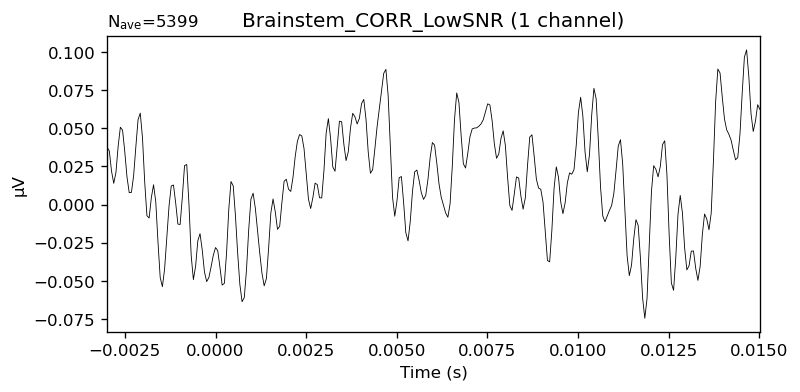

Need more than one channel to make topography for eeg. Disabling interactivity.


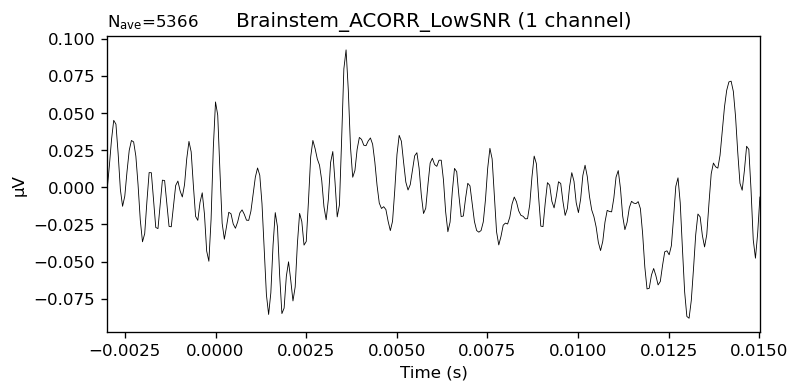

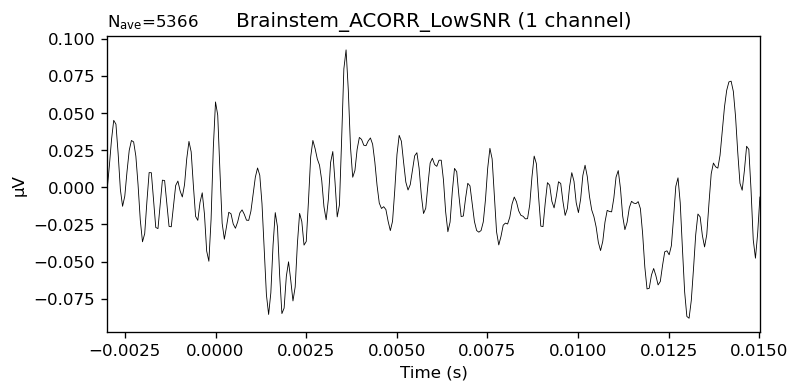

In [16]:
picks=['A31']
evoked_1.plot(picks=picks,titles=labels[0])
evoked_2.plot(picks=picks,titles=labels[1])

combining channels using "mean"
combining channels using "mean"


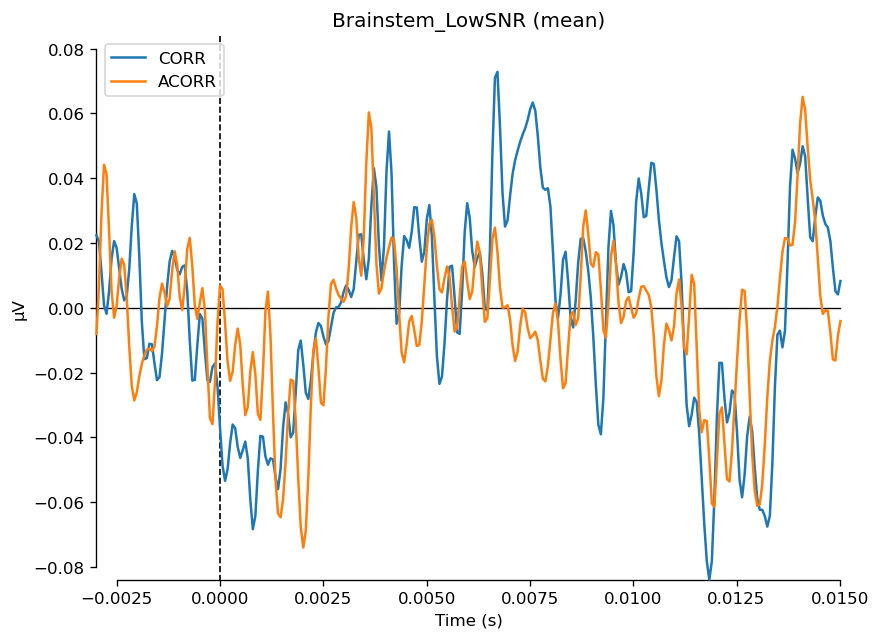

[<Figure size 960x720 with 1 Axes>]

In [17]:
picks=['A29','A30','A31', 'A32']
evokeds = dict(CORR=evoked_1, ACORR=evoked_2)
mne.viz.plot_compare_evokeds(evokeds, combine='mean',title='Brainstem_LowSNR')

In [18]:
#Visualizing spatial configuration

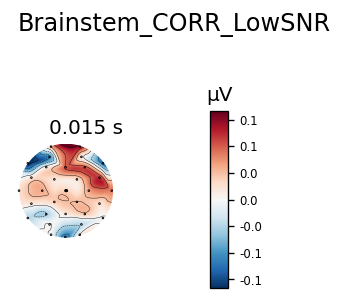

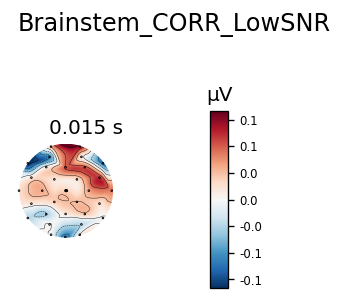

In [19]:
evoked_1.plot_topomap(0.015,title='Brainstem_CORR_LowSNR')          #Visualizing spatial configuration of the response

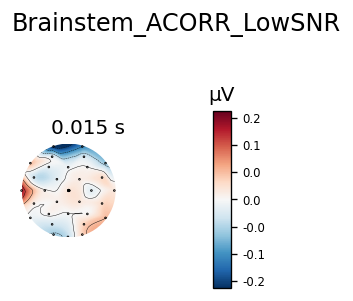

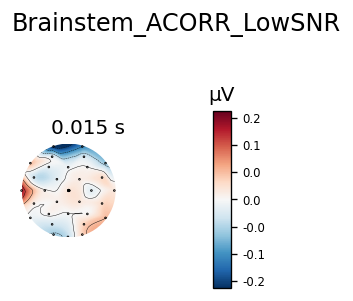

In [20]:
evoked_2.plot_topomap(0.015, title='Brainstem_ACORR_LowSNR')